In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

In [80]:
train = pd.read_csv("train.csv", parse_dates=['datetime'])
test = pd.read_csv("test.csv", parse_dates=['datetime'])
sub = pd.read_csv("sampleSubmission.csv")

train.shape, test.shape, sub.shape

((10886, 12), (6493, 9), (6493, 2))

In [3]:
col_names = [ 'season', 'holiday', 'workingday', 'weather'  ]

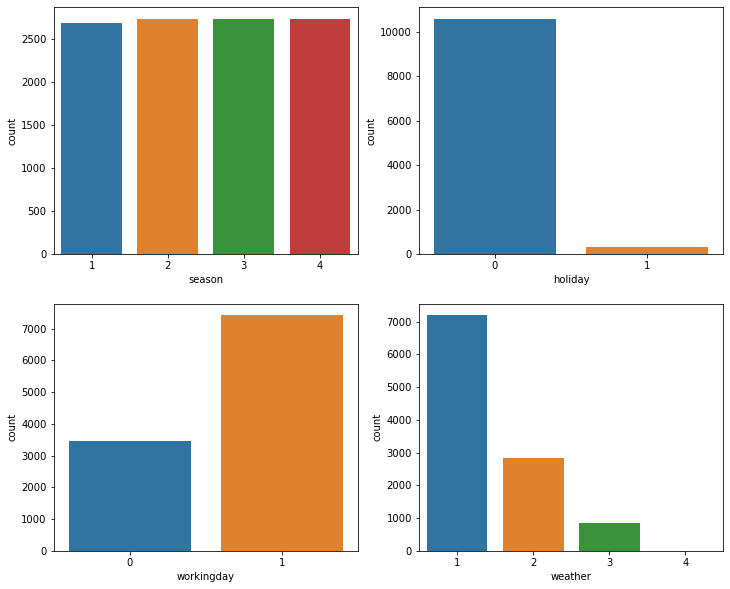

In [5]:
i = 0
plt.figure(figsize=(12,10))

for name in col_names:
    i = i + 1
    plt.subplot(2,2,i)
    sns.countplot(x=name, data=train)
    
plt.show()

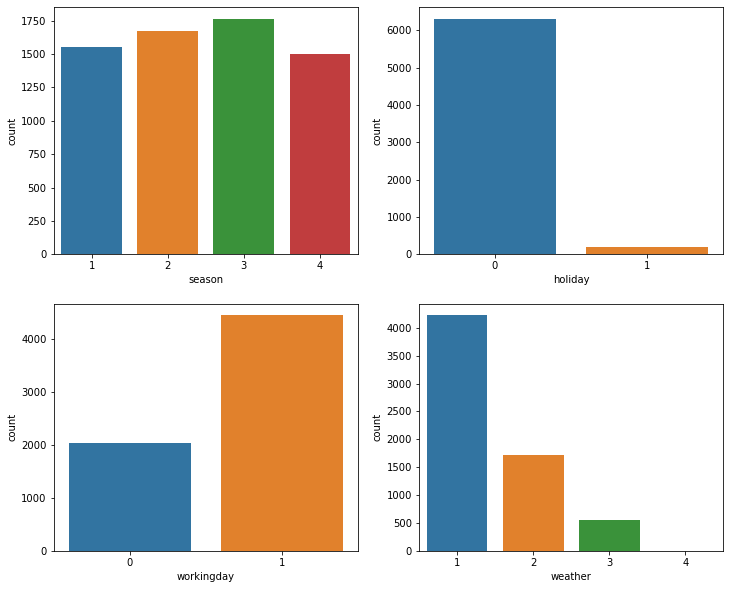

In [6]:
i = 0
plt.figure(figsize=(12,10))

for name in col_names:
    i = i + 1
    plt.subplot(2,2,i)
    sns.countplot(x=name, data=test)
    
plt.show()

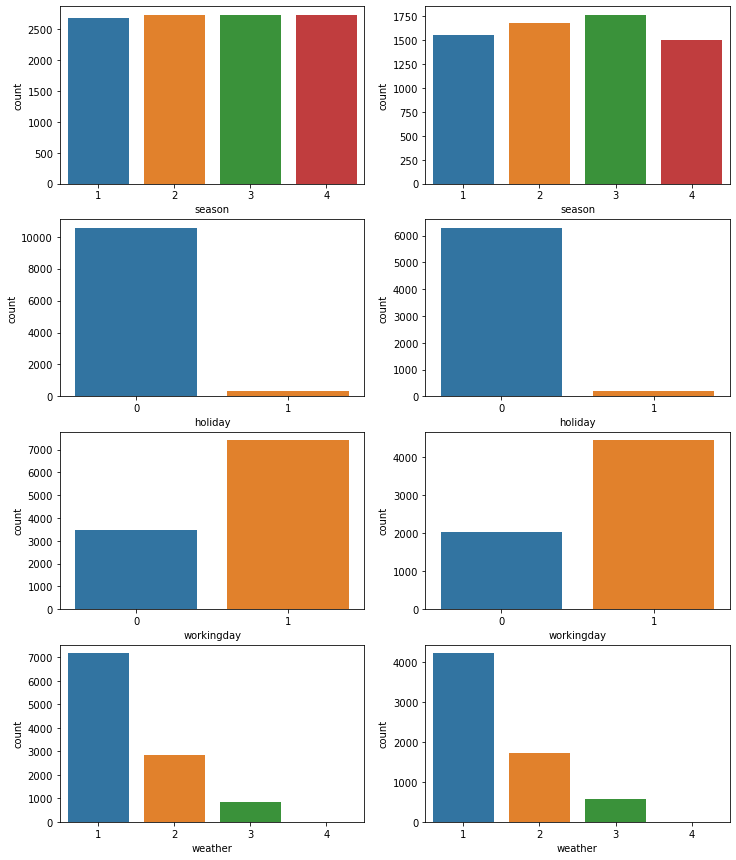

In [10]:
i = 0
plt.figure(figsize=(12,15))

for name in col_names:
    i = i + 1
    plt.subplot(4,2,i)
    sns.countplot(x=name, data=train)
    i = i + 1
    plt.subplot(4,2,i)
    sns.countplot(x=name, data=test)
    
plt.show()

In [15]:
train['weather'].value_counts() , test['weather'].value_counts() 

(1    7192
 2    2834
 3     859
 4       1
 Name: weather, dtype: int64,
 1    4221
 2    1710
 3     560
 4       2
 Name: weather, dtype: int64)

In [16]:
num_names = ['temp', 'atemp', 'humidity', 'windspeed']
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

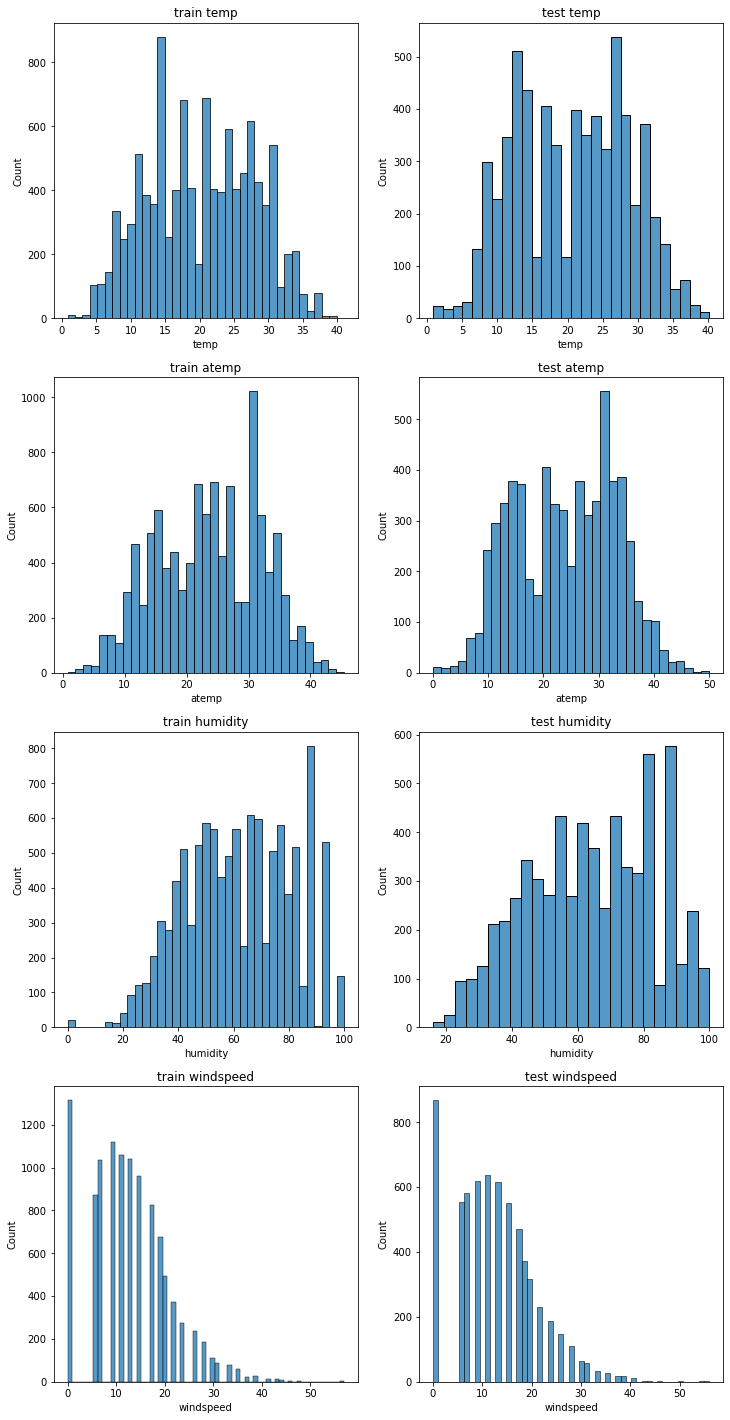

In [27]:
i = 0
plt.figure(figsize=(12,25))

for name in num_names:
    i = i + 1
    plt.subplot(4,2,i*2-1)
    sns.histplot(x=name, data=train)
    plt.title('train ' + name)
    
    plt.subplot(4,2,i*2)
    sns.histplot(x=name, data=test)
    plt.title('test ' + name)
    
plt.show()

In [23]:
test["windspeed"].value_counts()

0.0000     867
11.0014    638
8.9981     618
12.9980    615
7.0015     583
6.0032     553
15.0013    552
16.9979    471
19.0012    372
19.9995    316
22.0028    230
23.9994    186
26.0027    146
27.9993    109
30.0026     65
31.0009     57
32.9975     32
35.0008     26
39.0007     17
36.9974     17
40.9973     12
43.9989      3
54.0020      2
43.0006      2
46.0022      2
50.0021      1
55.9986      1
Name: windspeed, dtype: int64

In [31]:
train['datetime'], test['datetime']

(0       2011-01-01 00:00:00
 1       2011-01-01 01:00:00
 2       2011-01-01 02:00:00
 3       2011-01-01 03:00:00
 4       2011-01-01 04:00:00
                 ...        
 10881   2012-12-19 19:00:00
 10882   2012-12-19 20:00:00
 10883   2012-12-19 21:00:00
 10884   2012-12-19 22:00:00
 10885   2012-12-19 23:00:00
 Name: datetime, Length: 10886, dtype: datetime64[ns],
 0      2011-01-20 00:00:00
 1      2011-01-20 01:00:00
 2      2011-01-20 02:00:00
 3      2011-01-20 03:00:00
 4      2011-01-20 04:00:00
                ...        
 6488   2012-12-31 19:00:00
 6489   2012-12-31 20:00:00
 6490   2012-12-31 21:00:00
 6491   2012-12-31 22:00:00
 6492   2012-12-31 23:00:00
 Name: datetime, Length: 6493, dtype: datetime64[ns])

In [32]:
new_tr = train.copy()
new_test = test.copy()
new_tr.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [35]:
new_tr['year'] = new_tr['datetime'].dt.year
new_tr['month'] = new_tr['datetime'].dt.month
new_tr['day'] = new_tr['datetime'].dt.day

new_tr

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19


In [36]:
new_tr['hour'] = new_tr['datetime'].dt.hour
new_tr['minute'] = new_tr['datetime'].dt.minute
new_tr['second'] = new_tr['datetime'].dt.second

new_tr

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


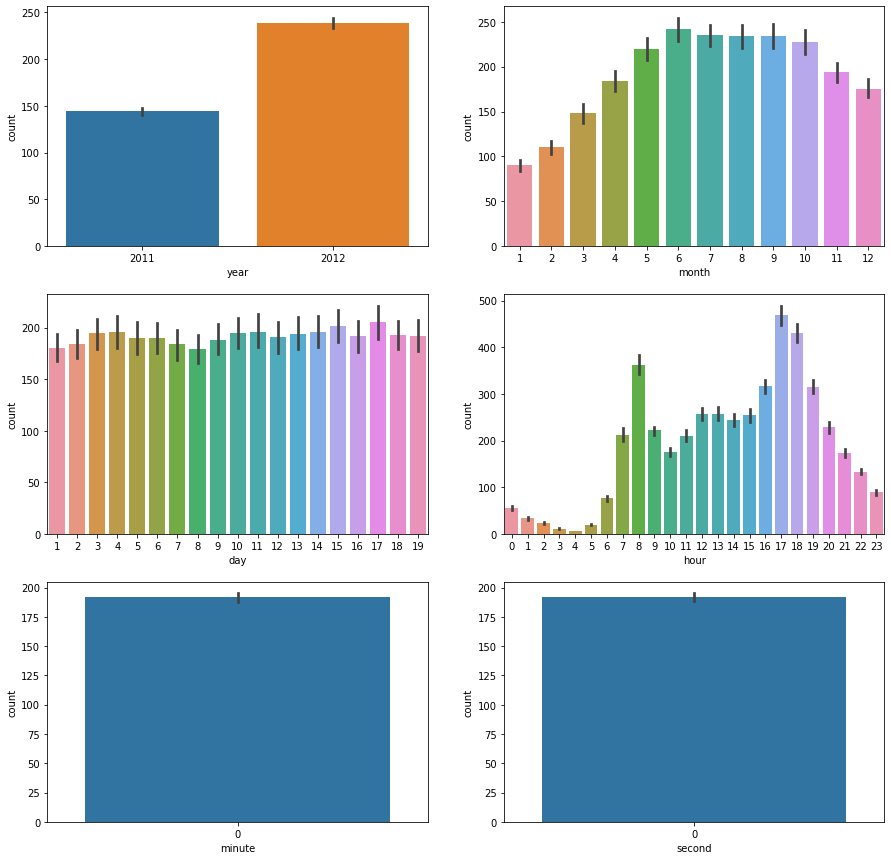

In [37]:
datetime_names = ['year', 'month', 'day', 'hour', 'minute', 'second']

plt.figure(figsize=(15,15))
for idx, name in enumerate(datetime_names):
    plt.subplot(3,2,idx+1)
    sns.barplot(x=name, y='count', data=new_tr)
    
plt.show()

In [38]:
new_test['year'] = new_test['datetime'].dt.year
new_test['month'] = new_test['datetime'].dt.month
new_test['day'] = new_test['datetime'].dt.day
new_test['hour'] = new_test['datetime'].dt.hour
new_test['minute'] = new_test['datetime'].dt.minute
new_test['second'] = new_test['datetime'].dt.second

new_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,19,0,0
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,20,0,0
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31,21,0,0
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31,22,0,0


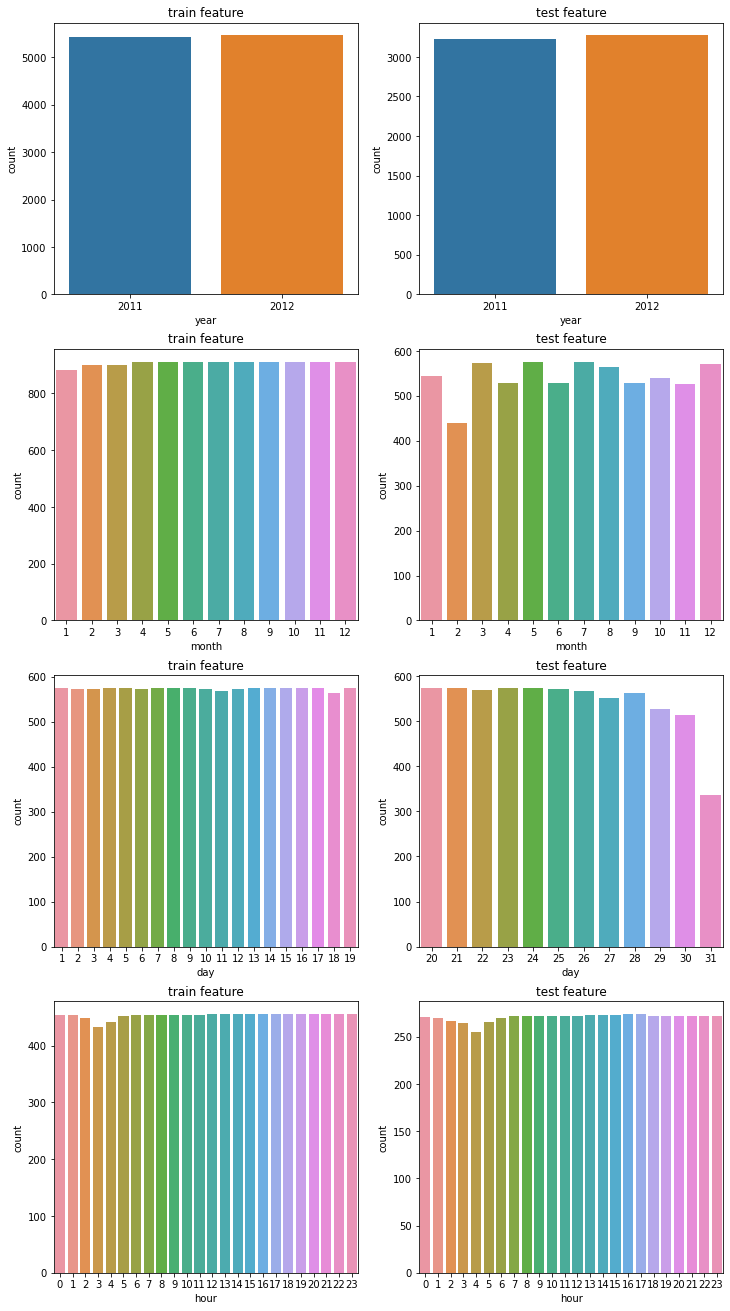

In [41]:
col_names = ['year','month','day','hour']
i = 0
plt.figure(figsize=(12,35))  ##전체 그래프 크기 지정

for name in col_names: ## 컬럼명으로 반복
  i = i+1
  plt.subplot(6,2,i)  ##2행2열, i = 1,2,3,4 (왼쪽 상단부터 시계방향으로 순번 지정)
  sns.countplot(x = name, data = new_tr)
  plt.title("train feature")
    
  i = i+1
  plt.subplot(6,2,i)  ##2행2열, i = 1,2,3,4 (왼쪽 상단부터 시계방향으로 순번 지정)
  sns.countplot(x = name, data = new_test)
  plt.title("test feature")
plt.show()

In [47]:
sel = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed']

In [48]:
sel_ex = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'hour'] 

In [45]:
X_tr = new_tr[sel]
y = new_tr['count']

X_last_test = new_test[sel]

X_train, X_test, y_train, y_test = train_test_split(X_tr, 
                                                    y,
                                                    test_size=0.3,
                                                    random_state=77)

In [46]:
model = LinearRegression()  # 모델 객체 생성.
model.fit(X_train, y_train)   
pred = model.predict(X_test)

# 모델 평가 - 결정계수 확인
print("학습용 데이터 결정계수: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 데이터 결정계수: {:.3f}".format(model.score(X_test, y_test)))

# MSE(mean squared error) 확인
mse_val = ( (pred - y_test) ** 2 ).sum() / len(pred) 
print("mse value : {:.3f}".format(mse_val))

학습용 데이터 결정계수: 0.262
테스트 데이터 결정계수: 0.257
mse value : 24015.117


In [49]:
X_tr = new_tr[sel_ex]
y = new_tr['count']

X_last_test = new_test[sel_ex]

X_train, X_test, y_train, y_test = train_test_split(X_tr, 
                                                    y,
                                                    test_size=0.3,
                                                    random_state=77)

In [50]:
model = LinearRegression()  # 모델 객체 생성.
model.fit(X_train, y_train)   
pred = model.predict(X_test)

# 모델 평가 - 결정계수 확인
print("학습용 데이터 결정계수: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 데이터 결정계수: {:.3f}".format(model.score(X_test, y_test)))

# MSE(mean squared error) 확인
mse_val = ( (pred - y_test) ** 2 ).sum() / len(pred) 
print("mse value : {:.3f}".format(mse_val))

학습용 데이터 결정계수: 0.393
테스트 데이터 결정계수: 0.377
mse value : 20129.050


In [85]:
preds = model.predict(X_last_test)
sub['count'] = preds
sub.loc[sub['count'] < 0, 'count'] = 0
sub.to_csv('second_model_lr.csv', index = False)

In [87]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

# 모델 평가 - 결정계수 확인
print("학습용 데이터 결정계수: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 데이터 결정계수: {:.3f}".format(model.score(X_test, y_test)))

# MSE(mean squared error) 확인
mse_val = ( (pred - y_test) ** 2 ).sum() / len(pred) 
print("mse value : {:.3f}".format(mse_val))

학습용 데이터 결정계수: 1.000
테스트 데이터 결정계수: 0.877
mse value : 3979.086


In [88]:
for i in range(1,31):
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    # 모델 평가 - 결정계수 확인
    print("max_depth : ", i)
    print("학습용 데이터 결정계수: {:.3f}".format(model.score(X_train, y_train)))
    print("테스트 데이터 결정계수: {:.3f}".format(model.score(X_test, y_test)))
    

max_depth :  1
학습용 데이터 결정계수: 0.312
테스트 데이터 결정계수: 0.311
max_depth :  2
학습용 데이터 결정계수: 0.405
테스트 데이터 결정계수: 0.401
max_depth :  3
학습용 데이터 결정계수: 0.493
테스트 데이터 결정계수: 0.484
max_depth :  4
학습용 데이터 결정계수: 0.575
테스트 데이터 결정계수: 0.565
max_depth :  5
학습용 데이터 결정계수: 0.653
테스트 데이터 결정계수: 0.642
max_depth :  6
학습용 데이터 결정계수: 0.699
테스트 데이터 결정계수: 0.685
max_depth :  7
학습용 데이터 결정계수: 0.801
테스트 데이터 결정계수: 0.777
max_depth :  8
학습용 데이터 결정계수: 0.863
테스트 데이터 결정계수: 0.843
max_depth :  9
학습용 데이터 결정계수: 0.907
테스트 데이터 결정계수: 0.876
max_depth :  10
학습용 데이터 결정계수: 0.937
테스트 데이터 결정계수: 0.887
max_depth :  11
학습용 데이터 결정계수: 0.959
테스트 데이터 결정계수: 0.890
max_depth :  12
학습용 데이터 결정계수: 0.972
테스트 데이터 결정계수: 0.890
max_depth :  13
학습용 데이터 결정계수: 0.981
테스트 데이터 결정계수: 0.889
max_depth :  14
학습용 데이터 결정계수: 0.987
테스트 데이터 결정계수: 0.890
max_depth :  15
학습용 데이터 결정계수: 0.991
테스트 데이터 결정계수: 0.887
max_depth :  16
학습용 데이터 결정계수: 0.994
테스트 데이터 결정계수: 0.885
max_depth :  17
학습용 데이터 결정계수: 0.996
테스트 데이터 결정계수: 0.881
max_depth :  18
학습용 데이터 결정계수: 0.997
테스트 데이터 결정계수: 0.877
m

In [89]:
# 파라미터 조절한 의사결정트리
model = DecisionTreeRegressor(max_depth=12)
model.fit(X_train, y_train)
pred = model.predict(X_test)

# 모델 평가 - 결정계수 확인
print("max_depth : ", i)
print("학습용 데이터 결정계수: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 데이터 결정계수: {:.3f}".format(model.score(X_test, y_test)))

max_depth :  30
학습용 데이터 결정계수: 0.972
테스트 데이터 결정계수: 0.889


In [93]:
pred = model.predict(X_last_test)
sub['count'] = pred
# sub.loc[sub['count'] < 0, 'count'] = 0
sub.to_csv('model_dt.csv', index = False)

In [91]:
sub

,datetime,count
0,2011-01-20 00:00:00,5.666667
1,2011-01-20 01:00:00,5.142857
2,2011-01-20 02:00:00,3.833333
3,2011-01-20 03:00:00,2.500000
4,2011-01-20 04:00:00,2.500000
...,...,...
6488,2012-12-31 19:00:00,381.000000
6489,2012-12-31 20:00:00,225.000000
6490,2012-12-31 21:00:00,174.111111
6491,2012-12-31 22:00:00,110.777778


In [94]:
X_last_test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,2012,12,19
6489,1,0,1,2,10.66,12.880,60,11.0014,2012,12,20
6490,1,0,1,1,10.66,12.880,60,11.0014,2012,12,21
6491,1,0,1,1,10.66,13.635,56,8.9981,2012,12,22


In [95]:
# 앙상블 - 랜덤 포레스트 모델
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

# 모델 평가 - 결정계수 확인
print("학습용 데이터 결정계수: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 데이터 결정계수: {:.3f}".format(model.score(X_test, y_test)))

학습용 데이터 결정계수: 0.991
테스트 데이터 결정계수: 0.941


In [96]:
for i in range(1,31):
    model = RandomForestRegressor(max_depth=i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    # 모델 평가 - 결정계수 확인
    print("max_depth : ", i)
    print("학습용 데이터 결정계수: {:.3f}".format(model.score(X_train, y_train)))
    print("테스트 데이터 결정계수: {:.3f}".format(model.score(X_test, y_test)))
    

max_depth :  1
학습용 데이터 결정계수: 0.312
테스트 데이터 결정계수: 0.311
max_depth :  2
학습용 데이터 결정계수: 0.451
테스트 데이터 결정계수: 0.448
max_depth :  3
학습용 데이터 결정계수: 0.534
테스트 데이터 결정계수: 0.530
max_depth :  4
학습용 데이터 결정계수: 0.597
테스트 데이터 결정계수: 0.589
max_depth :  5
학습용 데이터 결정계수: 0.668
테스트 데이터 결정계수: 0.660
max_depth :  6
학습용 데이터 결정계수: 0.725
테스트 데이터 결정계수: 0.712
max_depth :  7
학습용 데이터 결정계수: 0.832
테스트 데이터 결정계수: 0.807
max_depth :  8
학습용 데이터 결정계수: 0.888
테스트 데이터 결정계수: 0.869
max_depth :  9
학습용 데이터 결정계수: 0.929
테스트 데이터 결정계수: 0.909
max_depth :  10
학습용 데이터 결정계수: 0.953
테스트 데이터 결정계수: 0.929
max_depth :  11
학습용 데이터 결정계수: 0.966
테스트 데이터 결정계수: 0.936
max_depth :  12
학습용 데이터 결정계수: 0.975
테스트 데이터 결정계수: 0.939
max_depth :  13
학습용 데이터 결정계수: 0.981
테스트 데이터 결정계수: 0.940
max_depth :  14
학습용 데이터 결정계수: 0.985
테스트 데이터 결정계수: 0.941
max_depth :  15
학습용 데이터 결정계수: 0.987
테스트 데이터 결정계수: 0.941
max_depth :  16
학습용 데이터 결정계수: 0.988
테스트 데이터 결정계수: 0.941
max_depth :  17
학습용 데이터 결정계수: 0.989
테스트 데이터 결정계수: 0.941
max_depth :  18
학습용 데이터 결정계수: 0.990
테스트 데이터 결정계수: 0.942
m

In [100]:
# 앙상블 - 랜덤 포레스트 모델
model = RandomForestRegressor(max_depth=19, n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

# 모델 평가 - 결정계수 확인
print("학습용 데이터 결정계수: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 데이터 결정계수: {:.3f}".format(model.score(X_test, y_test)))

학습용 데이터 결정계수: 0.991
테스트 데이터 결정계수: 0.941


In [107]:
new_tr.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

In [104]:
new_tr['dayofweek'] = new_tr['datetime'].dt.dayofweek
new_test['dayofweek'] = new_test['datetime'].dt.dayofweek

In [105]:
sel_ex = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'hour', 'dayofweek']

In [106]:
X_tr = new_tr[sel_ex]
y = new_tr['count']

X_last_test = new_test[sel_ex]

X_train, X_test, y_train, y_test = train_test_split(X_tr, y, 
                                                   test_size=0.2,
                                                   random_state=77)

In [109]:
# 3-7 앙상블(랜덤포레스트) 모델로 확인해 보기
m = RandomForestRegressor()
m.fit(X_train, y_train)

print("학습용 결정계수 :", m.score(X_train, y_train))
print("테스트용 결정계수 :", m.score(X_test, y_test))

학습용 결정계수 : 0.9927411906292963
테스트용 결정계수 : 0.9522785173076815


In [112]:
preds = m.predict(X_last_test)
sub['count'] = preds

# count가 0보다 작으면 0으로 만든다.
sub.loc[ sub['count']<0 , "count"  ] = 0
sub.to_csv("5th_model_ensemble(add1).csv", index=False)

In [ ]:
# 여름인지 아닌지
new_tr['summer'] = new_tr.loc[new_tr['weather'] == 2] = 1
new_test['dayofweek'] = new_test['datetime'].dt.dayofweek

In [129]:
new_tr['summer'] = new_tr.loc[new_tr['weather'] == 2] = 1

In [137]:
X_tr_all = new_tr[sel_ex]        # 학습용 데이터 변수 선택
X_test_all = new_test[sel_ex]    # 테스트 데이터의 변수 선택 
print(X_tr_all.head())

   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   year  month  hour  dayofweek  
0  2011      1     0          5  
1  2011      1     1          5  
2  2011      1     2          5  
3  2011      1     3          5  
4  2011      1     4          5  


In [138]:
ex_X_tr = PolynomialFeatures(degree=2,
                            include_bias=False).fit_transform(X_tr_all)
ex_X_test = PolynomialFeatures(degree=2,
                            include_bias=False).fit_transform(X_test_all)

y_tr_all = new_tr['count']

ex_X_tr.shape, ex_X_test.shape, y_tr_all.shape

((10886, 90), (6493, 90), (10886,))

### 다항회귀

In [136]:
from sklearn.preprocessing import PolynomialFeatures

In [176]:
sel_ex = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'hour', 'dayofweek']

In [177]:
X_tr_all = new_tr[sel_ex]        # 학습용 데이터 변수 선택
X_test_all = new_test[sel_ex]    # 테스트 데이터의 변수 선택 
print(X_tr_all.head())

   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   year  month  hour  dayofweek  
0  2011      1     0          5  
1  2011      1     1          5  
2  2011      1     2          5  
3  2011      1     3          5  
4  2011      1     4          5  


In [195]:
ex_X_tr = PolynomialFeatures(degree=2,
                            include_bias=False).fit_transform(X_tr_all)
ex_X_test = PolynomialFeatures(degree=2,
                            include_bias=False).fit_transform(X_test_all)

y_tr_all = new_tr['count']

ex_X_tr.shape, ex_X_test.shape, y_tr_all.shape

((10886, 90), (6493, 90), (10886,))

In [196]:
X_train, X_test, y_train, y_test = train_test_split(ex_X_tr,
                                                   y_tr_all,
                                                   test_size=0.2, 
                                                   )

In [162]:
model = RandomForestRegressor(n_jobs=-1)  # 모델 객체 생성.
model.fit(X_train, y_train)           # 모델 학습
pred = model.predict(X_test)

# 결정계수 확인
print("학습용 데이터 결정계수: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 데이터 결정계수: {:.3f}".format(model.score(X_test, y_test)))

학습용 데이터 결정계수: 0.996
테스트 데이터 결정계수: 0.974


In [163]:
pred = model.predict(ex_X_test)
sub['count'] = pred
# sub.loc[sub['count'] < 0, 'count'] = 0
sub.to_csv('ex_model_rf.csv', index = False)

In [171]:
X_tr_all

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,2
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,12,20,2
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,12,21,2
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,12,22,2


## 자동 특징 추출

In [180]:
import warnings
warnings.filterwarnings(action='ignore')  # 경고 메시지 출력은 이제 그만 
from sklearn.feature_selection import SelectFromModel

In [197]:
print(X_train.shape, y_train.shape)

(8708, 90) (8708,)


In [182]:
select = SelectFromModel(RandomForestRegressor(n_estimators=100,
                                               random_state=37),
                                               threshold="0.1 * median")

select.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(random_state=37),
                threshold='0.1 * median')

In [183]:
X_train_l1 = select.transform(X_train)
X_test_l1 = select.transform(X_test)

X_train_l1.shape, X_test_l1.shape

((8708, 78), (2178, 78))

In [191]:
X_test_l1_all = select.transform(ex_X_test)
X_test_l1_all.shape

(6493, 78)

[False False False False  True  True  True  True  True  True  True  True
 False  True  True False  True  True  True  True  True  True  True  True
 False False False  True  True  True  True False False  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


Text(0.5, 0, 'feature number')

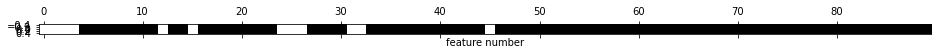

In [169]:
### 어떤 특성이 선택되었는지 확인
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("feature number")

In [170]:
seed = 37
model = RandomForestRegressor(n_jobs=-1, random_state=seed)  # 모델 객체 생성.
model.fit(X_train_l1, y_train)           # 모델 학습
pred = model.predict(X_test_l1)
# 결정계수 확인
print("학습용 데이터 결정계수: {:.3f}".format(model.score(X_train_l1, y_train)))
print("테스트 데이터 결정계수: {:.3f}".format(model.score(X_test_l1, y_test)))

학습용 데이터 결정계수: 0.996
테스트 데이터 결정계수: 0.975


In [193]:
pred = model.predict(X_test_l1_all)
sub['count'] = pred
sub.loc[sub['count'] < 0, 'count'] = 0
sub.to_csv('last_model_rf.csv', index = False)

<AxesSubplot:xlabel='log_count', ylabel='Count'>

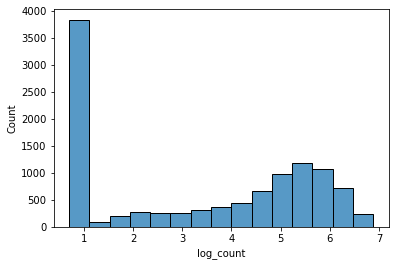

In [216]:
sns.histplot(x ='log_count', data = new_tr)

In [209]:
sel_ex = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'hour', 'dayofweek']

In [210]:
new_tr['log_count'] = np.log1p(new_tr['count'] )

In [211]:
X_tr = new_tr[sel_ex]
y = new_tr['log_count']

X_last_test = new_test[sel_ex]
X_train, X_test, y_train, y_test = train_test_split(X_tr, y, 
                                                   test_size=0.2,
                                                   random_state=77)

In [212]:
# 3-7 앙상블(랜덤포레스트) 모델로 확인해 보기
m = RandomForestRegressor()
m.fit(X_train, y_train)

print("학습용 결정계수 :", m.score(X_train, y_train))
print("테스트용 결정계수 :", m.score(X_test, y_test))

학습용 결정계수 : 0.9985222981318853
테스트용 결정계수 : 0.9901386109508653


In [218]:
preds = m.predict(X_last_test)

sub['count'] = np.expm1(preds)
sub.to_csv("9th_model_ensemble.csv", index=False)